# Visualization

The purpose of this notebook is to provide a simple way to visualize the results of the analysis.

## 2: Hardware in the loop simulation.

### 2.1: Importing raw results.

In [18]:
rawLin = []

cases = range(4)

for i in cases:
    fileName = "../matlab_framework/sim/sim3_n7_case" + str(i+1) + ".txt"
    f = open(fileName, "r")
    rawLin.append(f.read())
    f.close()
    rawLin[i] = rawLin[i].split('\n')

timeLength = int(rawLin[0][0].split(',')[0])

for i in cases:
    rawLin[i] = rawLin[i][1:]

timeVect = 0
Pmppt = 1
PspTotal = 2
Vmppt = 3
VBat = 4
SoC = 5
DlLost = 6
Task1 = 7
Task2 = 8
Task3 = 9
Task4 = 10
Task5 = 11
Task6 = 12
Task7 = 13
Pload = 14
Ph = 15
W = 16

for i in cases:
    for j in range(17):
        rawLin[i][j] = rawLin[i][j].split(',')
        # discard last element
        rawLin[i][j] = rawLin[i][j][:-1]

for i in cases:
    for j in range(17):
        for k in range(len(rawLin[i][j])):
            rawLin[i][j][k] = float(rawLin[i][j][k])

### 2.2: Plotting the results.

In [19]:
casesToPlot = [1, 2, 3, 4]

import matplotlib.pyplot as plt

timeList = [i/3600 for i in rawLin[0][timeVect]]

cases = [i-1 for i in casesToPlot]

English, linear priority.

In [ ]:

# plot from Task1 to Task7 as subplots
for i in cases:
    plt.figure(figsize =(16, 9))
    plt.subplot(7, 1, Task1-6)
    plt.plot(timeList, rawLin[i][Task1], '-', color='blue', linewidth=0.5)
    plt.subplot(7, 1, Task2-6)
    plt.plot(timeList, rawLin[i][Task2], '-', color='red', linewidth=0.5)
    plt.subplot(7, 1, Task3-6)
    plt.plot(timeList, rawLin[i][Task3], '-', color='green', linewidth=0.5)
    plt.subplot(7, 1, Task4-6)
    plt.plot(timeList, rawLin[i][Task4], '-', color='orange', linewidth=0.5)
    plt.subplot(7, 1, Task5-6)
    plt.plot(timeList, rawLin[i][Task5], '-', color='purple', linewidth=0.5)
    plt.subplot(7, 1, Task6-6)
    plt.plot(timeList, rawLin[i][Task6], '-', color='brown', linewidth=0.5)
    plt.subplot(7, 1, Task7-6)
    plt.plot(timeList, rawLin[i][Task7], '-', color='black', linewidth=0.5)
    # Add labels
    plt.subplot(7, 1, Task1-6)
    plt.title("Case " + str(i+1) + " (linear priority): Tasks On-Off Status")
    plt.ylabel('Task1')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task2-6)
    plt.ylabel('Task2')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task3-6)
    plt.ylabel('Task3')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task4-6)
    plt.ylabel('Task4')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task5-6)
    plt.ylabel('Task5')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task6-6)
    plt.ylabel('Task6')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task7-6)
    plt.ylabel('Task7')
    plt.ylim(-0.1, 1.1)
    plt.xlabel('Time [h]')
    # increase space between subplots
    plt.subplots_adjust(hspace=1.0)
    plt.savefig('graphs/en-lin-tasks-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    plt.figure(figsize =(16, 3))
    plt.plot(timeList, rawLin[i][DlLost], 'o', markersize=2, color='tab:blue')
    # add labels
    plt.title("Case " + str(i+1) + " (linear priority): Deadline Misses")
    plt.ylabel('Deadline Misses')
    plt.xlabel('Time [h]')
    plt.savefig('graphs/en-lin-dl-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    batPercentage = [j*100 for j in rawLin[i][SoC]]
    plt.figure(figsize =(4, 2))
    # plot SoC with fixed y-axis
    plt.plot(timeList, batPercentage, '-', color='tab:green', linewidth=2)
    plt.ylim(0, 100)
    # add labels
    plt.title("Case " + str(i+1) + " (linear priority): Battery SoC")
    plt.ylabel('SoC [%]')
    plt.xlabel('Time [h]')
    plt.savefig('graphs/en-lin-soc-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    fig, ax1 = plt.subplots(figsize =(16, 6))
    ax1.plot(timeList, rawLin[i][Vmppt], '-', color='tab:orange', linewidth=1)
    ax1.plot(timeList, rawLin[i][PspTotal], '.', color='tab:orange', markersize=0.5)
    ax1.set_ylabel('Power [W]')
    ax1.set_xlabel('Time [h]')
    ax1.tick_params(axis='y', labelcolor='tab:orange')
    ax1.set_ylim(0, 5)
    ax2 = ax1.twinx()
    ax2.plot(timeList, rawLin[i][Pmppt], '-', color='tab:blue', linewidth=1)
    ax2.plot(timeList, rawLin[i][VBat], '.', color='tab:blue', markersize=0.5)
    ax2.set_ylabel('Voltage [V]')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_title("Case " + str(i+1) + " (linear priority): Power vs Battery Voltage")
    ax2.set_ylim(0, 5)
    fig.tight_layout()
    # add background color
    fig.patch.set_facecolor('#E0E0E0')
    fig.savefig('graphs/en-lin-power-case' + str(i+1) + '.svg', format='svg', dpi=1200)


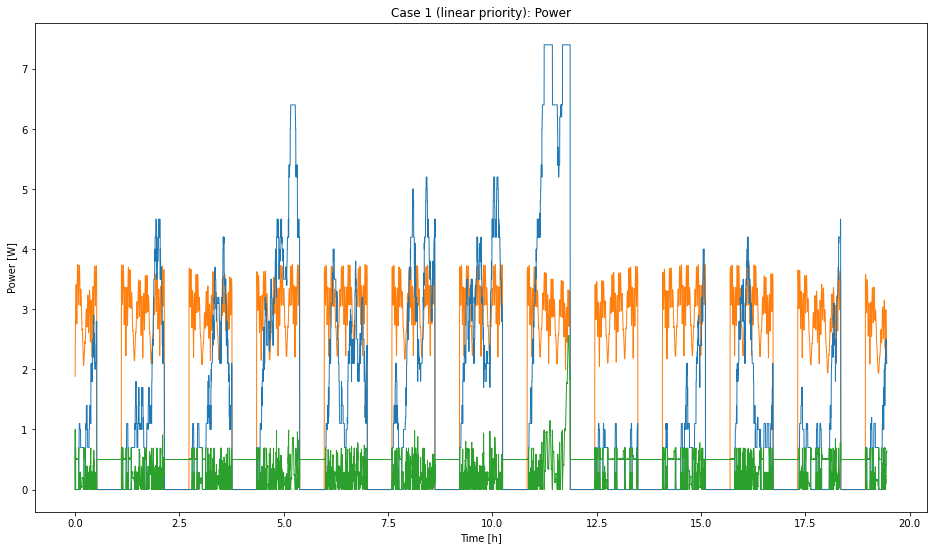

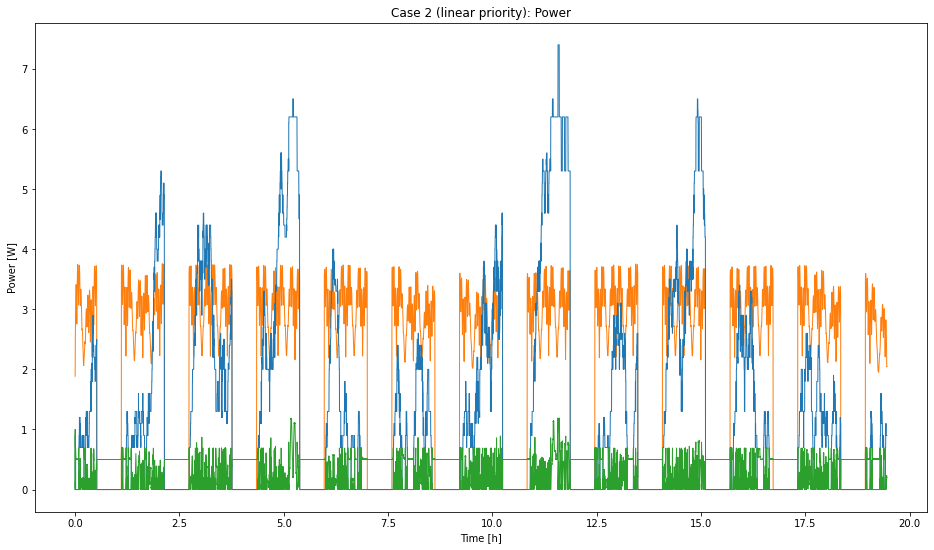

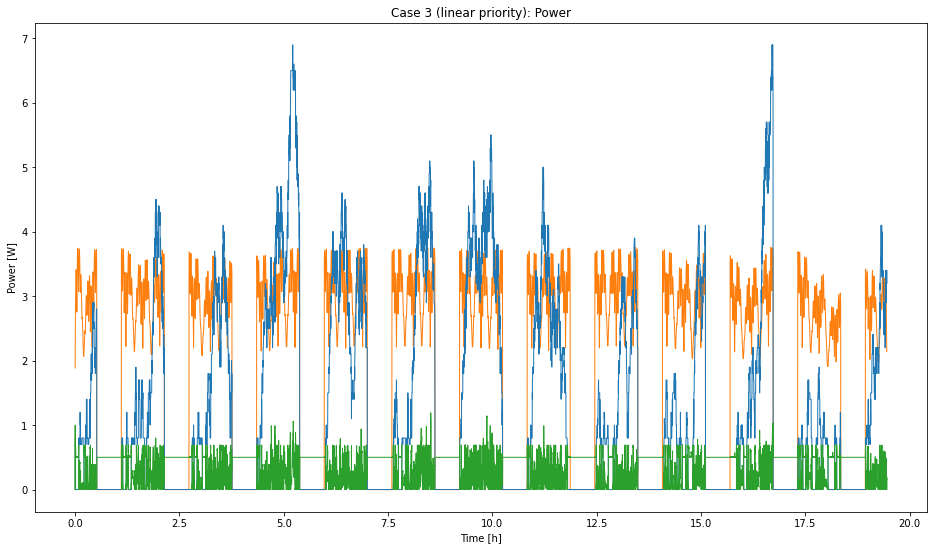

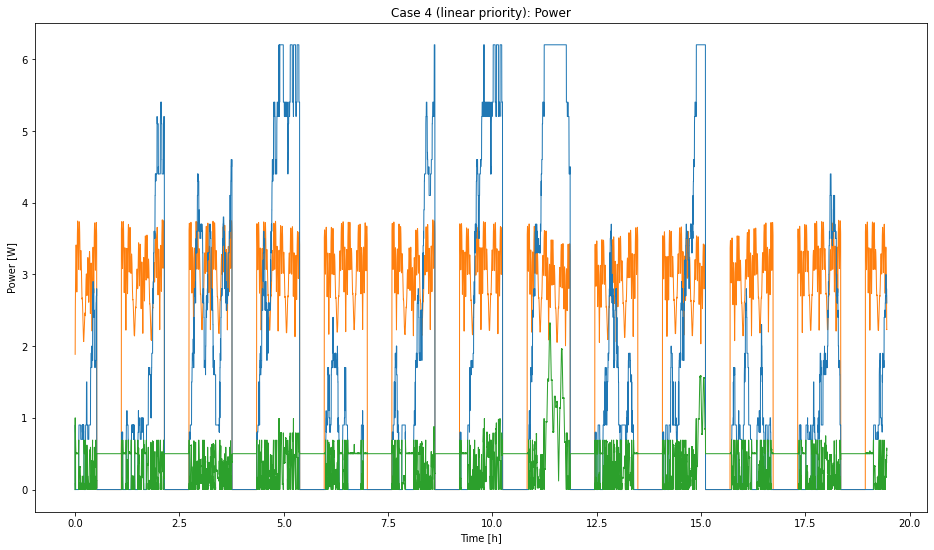

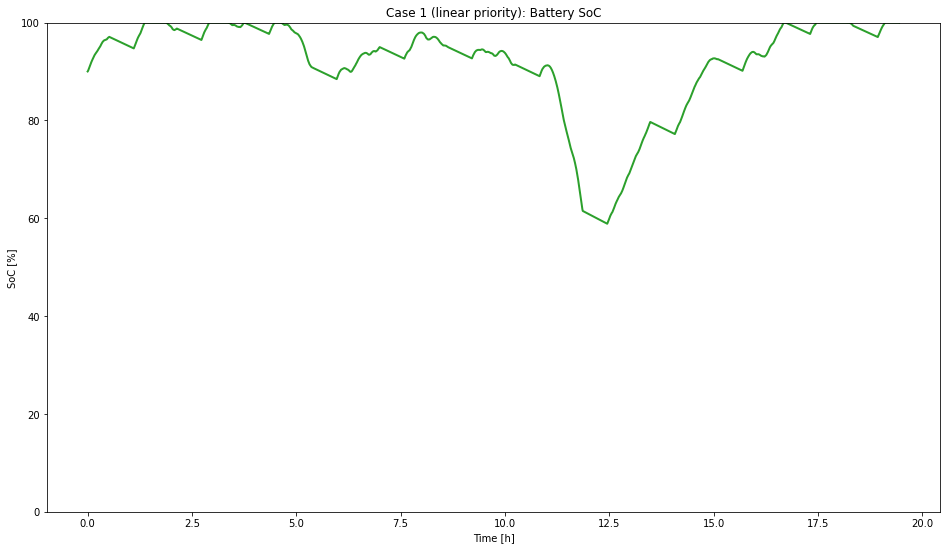

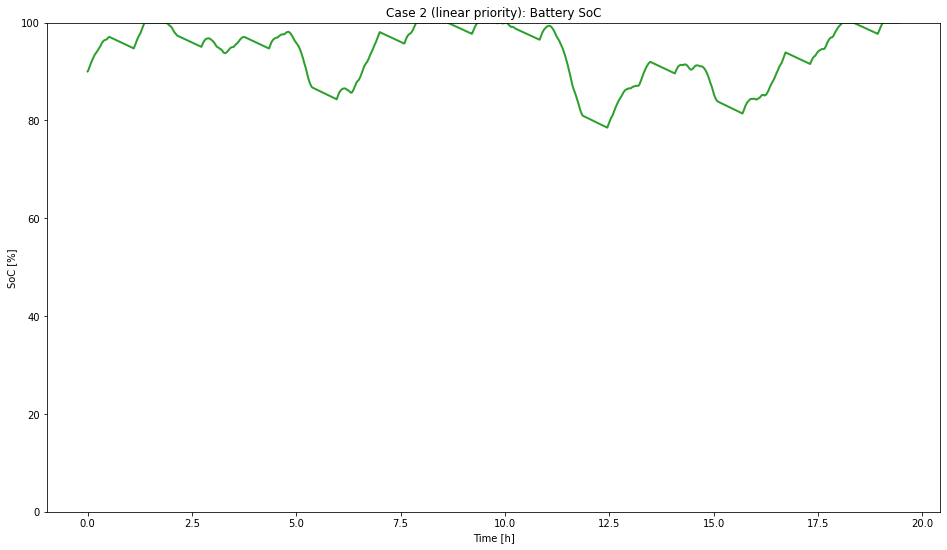

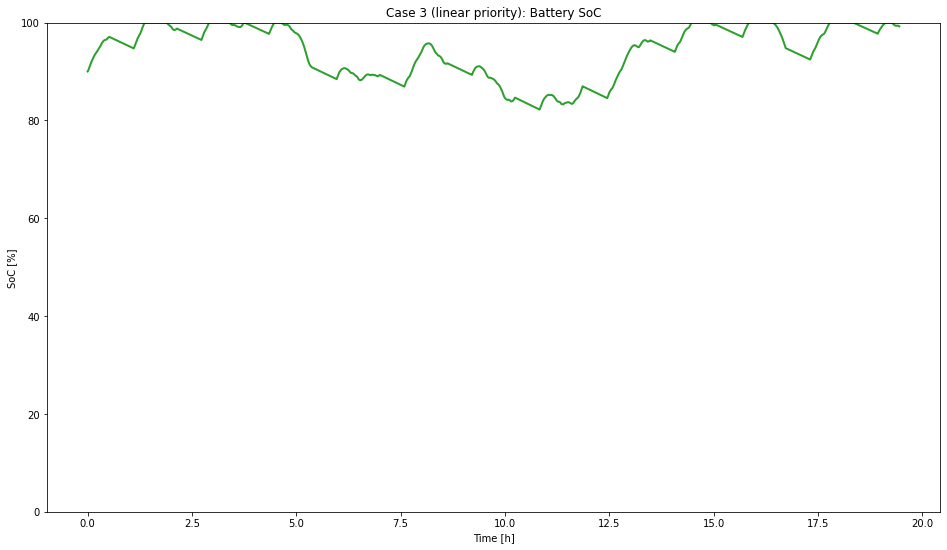

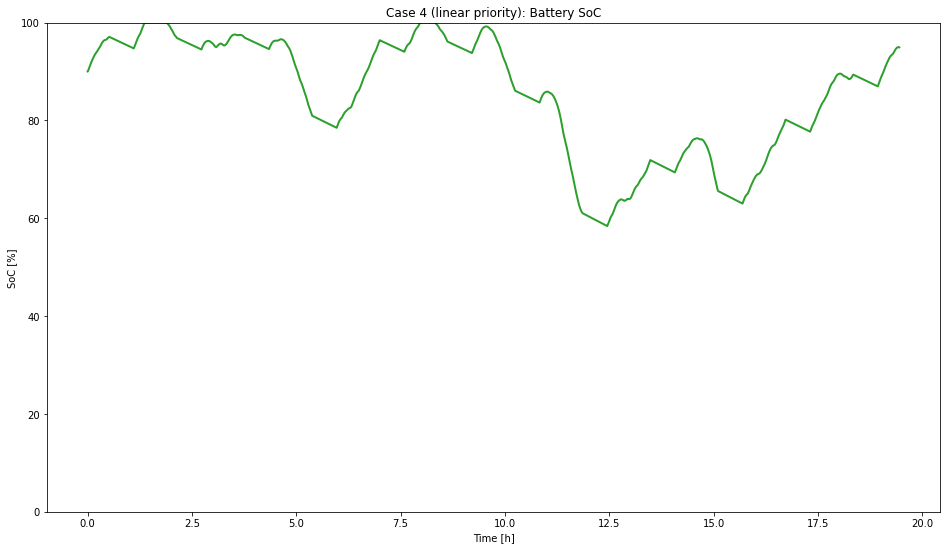

In [20]:
for i in cases:
    plt.figure(figsize =(16, 9))
    # plot SoC with fixed y-axis
    plt.plot(timeList, rawLin[i][PspTotal], '-', color='tab:orange', linewidth=1)
    plt.plot(timeList, rawLin[i][Pload], '-', color='tab:blue', linewidth=1)
    plt.plot(timeList, rawLin[i][Ph], '-', color='tab:green', linewidth=1)
    # plt.plot(timeList, rawLin[i][W], '-', color='tab:red', linewidth=1)
    # add labels
    plt.title("Case " + str(i+1) + " (linear priority): Power")
    plt.ylabel('Power [W]')
    plt.xlabel('Time [h]')

for i in cases:
    batPercentage = [j*100 for j in rawLin[i][SoC]]
    plt.figure(figsize =(16, 9))
    # plot SoC with fixed y-axis
    plt.plot(timeList, batPercentage, '-', color='tab:green', linewidth=2)
    plt.ylim(0, 100)
    # add labels
    plt.title("Case " + str(i+1) + " (linear priority): Battery SoC")
    plt.ylabel('SoC [%]')
    plt.xlabel('Time [h]')